In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [8]:
# Lets make a fake simple image for testing
simple1 = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]], 
                    [[0, 0, 0], [255, 255, 255], [0, 0, 0]]])

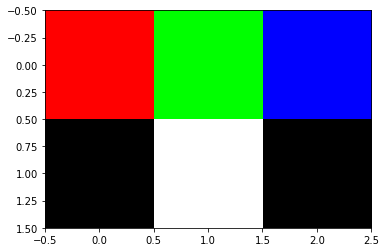

In [9]:
plt.imshow(simple1)

In [10]:
simple2 = np.array([[[230, 50, 50], [70, 70, 70], [130, 50, 200]], 
                    [[255, 160, 20], [255, 255, 255], [255, 180, 255]]])

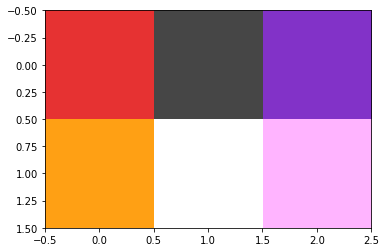

In [11]:
plt.imshow(simple2)

In [28]:
def average_frames(im1, im2):
    return (im1 + im2) / 2

In [29]:
average_frames(simple1, simple2)

array([[[242.5,  25. ,  25. ],
        [ 35. , 162.5,  35. ],
        [ 65. ,  25. , 227.5]],

       [[127.5,  80. ,  10. ],
        [255. , 255. , 255. ],
        [127.5,  90. , 127.5]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


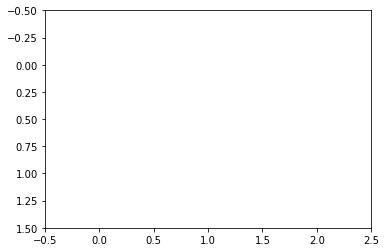

In [30]:
plt.imshow(average_frames(simple1, simple2))

In [3]:
# Now that we know how to do that with a simple image, lets do it with two actual frames.
frame0 = Image.open("frame0.jpg")
frame1 = Image.open("frame1.jpg")

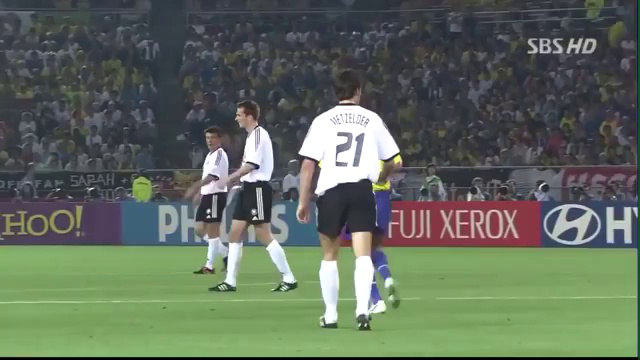

In [4]:
frame0

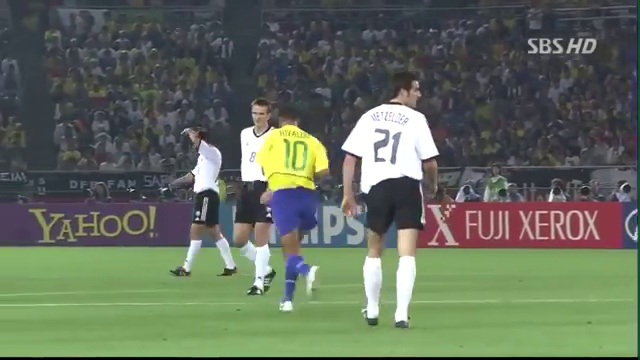

In [5]:
frame1

In [30]:
# We have these two frames, from the 0th and 1st second of the video.
# lets get the pixels for each one.
pixels0 = np.uint8(frame0)
pixels1 = np.uint8(frame1)

# Then average them together
# Note that we have to have integer values for the pixels,
# which is why we convert the array to type=uint8
average = np.uint8(0.5*pixels0 + 0.5*pixels1)

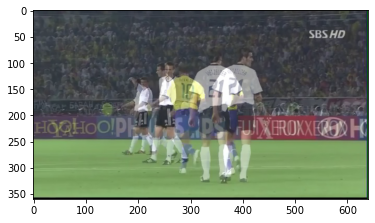

In [31]:
plt.imshow(average)

Now that we have an averaged image, we can try to run it through clip to see what it generates.

In [32]:
import os
import clip
import torch

In [33]:
model, preprocess = clip.load("ViT-B/32", device = 'cpu')

In [34]:
image = Image.fromarray(average)

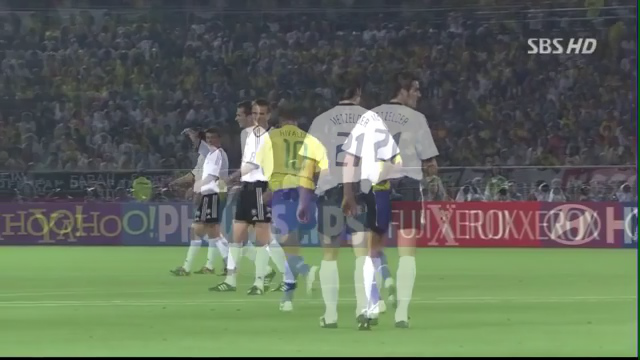

In [35]:
image

In [74]:
image_input = preprocess(image).unsqueeze(0).to("cpu")

# create some fake labels
labels = ['a photo of a soccer match', 
          'a photo of a rugby game',
          'a photo of game show', 
          'a photo of a bowl of fruit',
          'a photo of the pacific ocean']

text_inputs = clip.tokenize(labels)

In [75]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
    
    logits_per_image, logits_per_text = model(image_input, text_inputs)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [76]:
probs[0, 1]

0.0065497067

In [91]:
print("Predictions:\n")
for i in range(5):
    print(f"{labels[i]:>30s}: {100 * probs[0, i]:.2f}%")

Predictions:

     a photo of a soccer match: 99.20%
       a photo of a rugby game: 0.65%
          a photo of game show: 0.14%
    a photo of a bowl of fruit: 0.00%
  a photo of the pacific ocean: 0.00%


That looks like a success to me!